In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.pandas.set_option('display.max_columns',None)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [8]:
df=pd.read_csv("/kaggle/input/wine-quality/winequalityN.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
from pandas_profiling import ProfileReport



In [10]:
profile = ProfileReport(df)

In [11]:
profile.to_widgets()


Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
features=[feature for feature in df.columns if df[feature].isnull().sum()>0]
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample       
for feature in features:
  impute_nan(df,feature,df[feature].median())


In [13]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,fixed acidity_median,fixed acidity_random,volatile acidity_median,volatile acidity_random,citric acid_median,citric acid_random,residual sugar_median,residual sugar_random,chlorides_median,chlorides_random,pH_median,pH_random,sulphates_median,sulphates_random
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,7.0,7.0,0.27,0.27,0.36,0.36,20.7,20.7,0.045,0.045,3.00,3.00,0.45,0.45
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,6.3,6.3,0.30,0.30,0.34,0.34,1.6,1.6,0.049,0.049,3.30,3.30,0.49,0.49
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,8.1,8.1,0.28,0.28,0.40,0.40,6.9,6.9,0.050,0.050,3.26,3.26,0.44,0.44
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,7.2,7.2,0.23,0.23,0.32,0.32,8.5,8.5,0.058,0.058,3.19,3.19,0.40,0.40
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,7.2,7.2,0.23,0.23,0.32,0.32,8.5,8.5,0.058,0.058,3.19,3.19,0.40,0.40


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

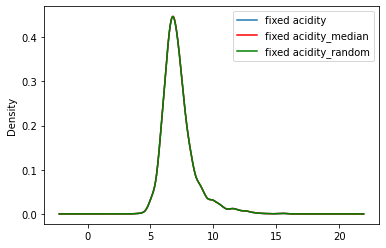

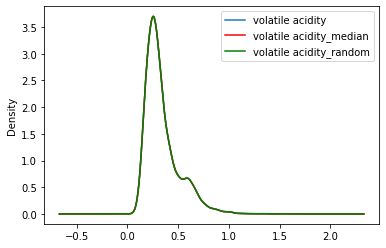

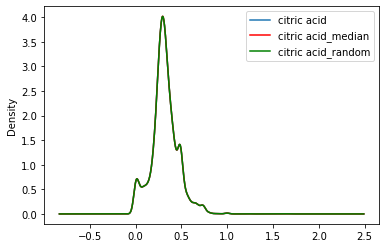

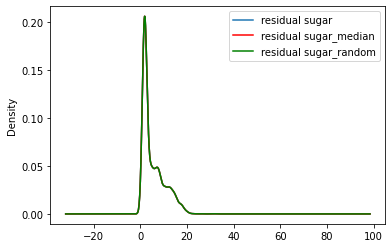

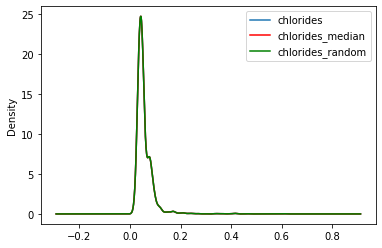

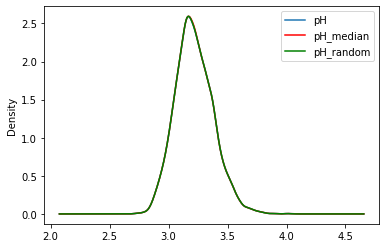

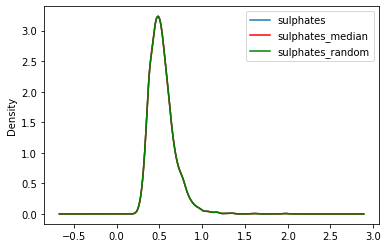

In [16]:
for feature in features:
  fig = plt.figure()
  ax = fig.add_subplot(111)
  df[feature].plot(kind='kde', ax=ax)
  df[feature+"_median"].plot(kind='kde', ax=ax, color='red')
  df[feature+"_random"].plot(kind='kde', ax=ax, color='green')

  lines, labels = ax.get_legend_handles_labels()
  ax.legend(lines, labels, loc='best')

In [18]:
df=pd.read_csv("/kaggle/input/wine-quality/winequalityN.csv")
for feature in features:
  df[feature]=df[feature].fillna(df[feature].median())

In [19]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
for feature in df.columns:
   print(f'{np.where(df[feature]==0,1,0).mean()*100} % zeros in {feature}')

0.0 % zeros in type
0.0 % zeros in fixed acidity
0.0 % zeros in volatile acidity
2.308757888256118 % zeros in citric acid
0.0 % zeros in residual sugar
0.0 % zeros in chlorides
0.0 % zeros in free sulfur dioxide
0.0 % zeros in total sulfur dioxide
0.0 % zeros in density
0.0 % zeros in pH
0.0 % zeros in sulphates
0.0 % zeros in alcohol
0.0 % zeros in quality


<AxesSubplot:xlabel='quality'>

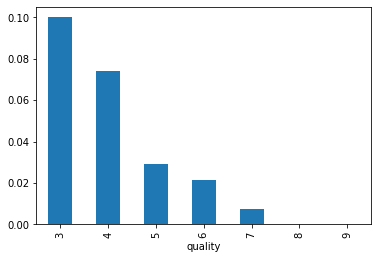

In [30]:
df['citric acid/zeros']=np.where(df['citric acid']==0,1,0)
(df.groupby("quality")["citric acid/zeros"].mean()).plot.bar()

In [31]:
df=pd.get_dummies(df,drop_first=True)
print(df.columns)
df.head(1)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'citric acid/zeros',
       'type_white'],
      dtype='object')


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric acid/zeros,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,0,1


<AxesSubplot:xlabel='quality'>

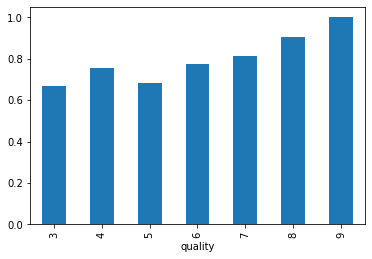

In [32]:
df.groupby("quality")["type_white"].mean().plot.bar()

<AxesSubplot:>

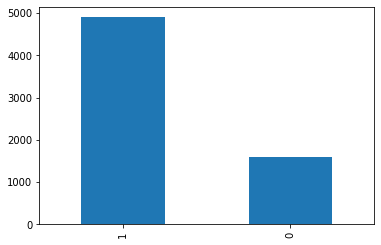

In [33]:
df['type_white'].value_counts().plot.bar()

In [35]:
dff = df.drop_duplicates(keep='first').copy()


In [59]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol',
       'type_white']]
y=df["quality"]

<AxesSubplot:>

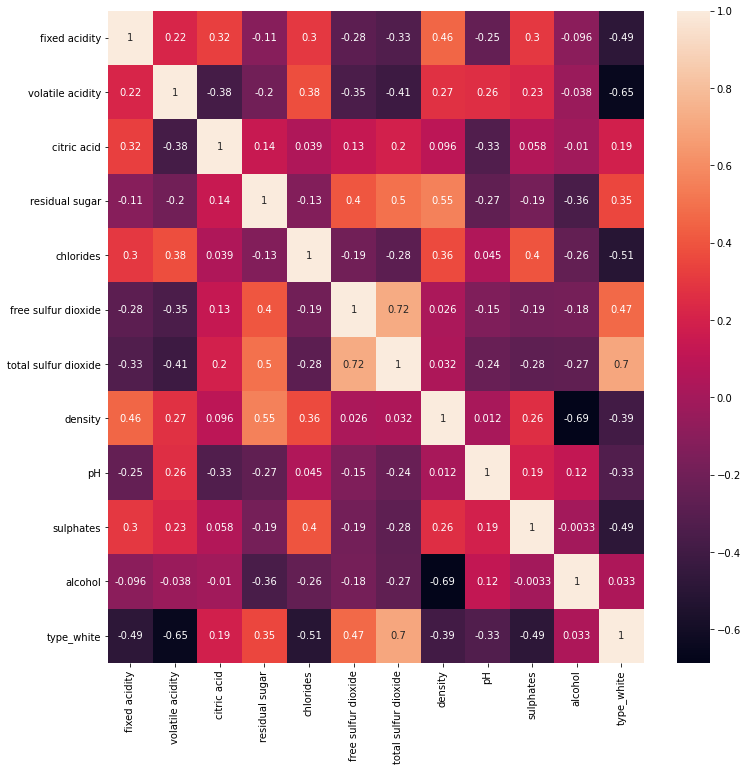

In [60]:
import seaborn as sns
corr=X.corr()
top_features=corr.index
plt.figure(figsize=(12,12))
sns.heatmap(X[top_features].corr(),annot=True)

In [61]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [62]:
correlation(X,0.6)

{'alcohol', 'total sulfur dioxide', 'type_white'}

In [63]:
X=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol',
       ]]
y=df["quality"]

In [64]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# TRANSFORM THE DATASET
X,y = oversample.fit_resample(X,y)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

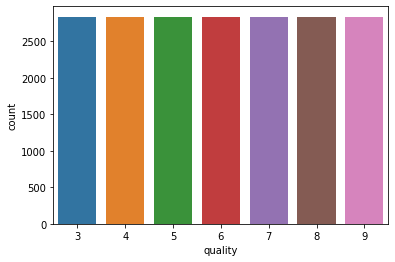

In [65]:
sns.countplot(y)


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
from sklearn.ensemble import RandomForestClassifier


In [68]:
rf_random = RandomForestClassifier()

rf_random.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
from sklearn.model_selection import cross_val_score
ytrain_pred = rf_random.predict(X_train)
ytest_pred = rf_random.predict(X_test)
print(rf_random.score(X_train, y_train))
print(rf_random.score(X_test, y_test))
score = cross_val_score(rf_random,X,y,cv=10)
print('CV Score ', np.mean(score)*100)

1.0
0.8838146406984554
CV Score  83.88084094961962


In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [75]:
pipeline_rf = Pipeline([('scalar', StandardScaler()),
                      ('pca', PCA(n_components=10)),
                      
                       ('rf_classifier', RandomForestClassifier())])

In [76]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('scalar', StandardScaler()), ('pca', PCA(n_components=10)),
                ('rf_classifier', RandomForestClassifier())])

In [77]:
pipeline_rf.score(X_test, y_test)

0.8710543989254533

In [78]:
score = cross_val_score(pipeline_rf,X,y,cv=5)
print('CV Score ', np.mean(score)*100)

CV Score  80.53099454673587
